In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import numpy as np
import matplotlib
import pickle
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA

sns.set(font_scale=1, context='notebook')
matplotlib.rcParams['figure.figsize'] = 10,10
plt.rcParams['axes.facecolor'] = '#f5f5f5f5'

# Load data
<br>

In [2]:
# Load gate vector data
with open('output/' + 'test' + '.pkl', 'rb') as f:
        input = pickle.load(f)

In [3]:
# Get components from data
gates = np.array(input[0])
labels = np.array(input[1])
images = np.array(input[2])
parameter_dict = input[3]

In [4]:
print(parameter_dict)
print(labels)
print(gates.shape)

{'M': 3, 'L': 5, 'num_batches': 1001, 'tensor_size': 30, 'gamma': 2, 'learning_rate': 0.001, 'batch_size': 100, 'output_file': 'test'}
[0 3 3 ..., 0 1 1]
(2500, 5, 3)


# Define Functions

In [5]:
def visualize_gates(gates, images, num_test_digits=10, shuffle=True):
    '''
    Visualize num_test_digits examples of gate activations
    '''
    # Indiviual cell is height=1, width=0.4
    width = 1 * gates.shape[2] # Cell width * num of modules
    height = 0.4 * gates.shape[1] # Cell height * num of layers
    figsize = (width, height) 

    plot_num = num_test_digits * 100 + 11
    for i in range(num_test_digits):
        # To shuffle
        if shuffle:
            k = (i + np.random.randint(low=0, high=gates.shape[0]-1)) % gates.shape[0]
        else:
            k = i

        plt.figure(figsize=(5, 2))
        plt.title('Number is: '+str(labels[k]))
        sns.heatmap(gates[k,:,:])
        plt.figure(figsize=(2, 2))
        plt.imshow(images[k])


def compute_cosine_sim(gates, parameter_dict, num_test_digits, trial = 2):
    '''
    Compute cosine similarity
    '''
    gate_vectors = np.reshape(gates, (-1, parameter_dict['L']*parameter_dict['M']))
    #print(gate_vectors.shape)
    gate_vectors = np.transpose(gate_vectors)

    output = np.zeros(num_test_digits)
    for i in range(num_test_digits):
        a = gate_vectors[:, trial]
        b = gate_vectors[:, i]
        an = a/np.linalg.norm(a)
        bn = b/np.linalg.norm(b)
        output[i] = np.dot(an,bn)

    print('output', output)
    elems = np.argsort(output)
    print('Most similar elems to trial', elems[::-1])
    
    
def visualize_model(gates_reshaped, labels, model):
    '''
    Visualize the data X, with label y with the model (t-SNE or PCA)
    '''
    print(gates_reshaped.shape) # sanity check
    independent_labels = list(set(labels))
    print(independent_labels) # sanity check

    x = model.fit_transform(gates_reshaped)
    y = labels

    # Add more colors if doing something other than MNIST
    colors = ['b','g','#00FFFF','c','m','y','k','#0048BA','r','#F4C2C2']

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    for i in (independent_labels):
        mask_i = y == i
        x_i = x[mask_i]
        ax1.scatter(x_i[:,0], x_i[:,1], s=10, c=colors[i], label='Label: '+str(i))
    plt.legend(loc='upper left');
    plt.show()


def visualize_comparison(gates_reshaped, labels, model, a=7, b=8):
    y = labels
    # Comparing a and b
    maska = y == a
    maskb = y == b
    reshapeda = gates_reshaped[maska]
    num_a = len(reshapeda) # number of 'a's (used below for scatterplot)
    reshapedb = gates_reshaped[maskb]
    rab = np.concatenate((reshapeda, reshapedb), axis=0)

    '''
    print(rab.shape)
    print(reshapeda.shape)
    print(reshapedb.shape)
    print(num_a)
    '''

    xab = model.fit_transform(rab)

    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(xab[:num_a,0], xab[:num_a,1], s=10, c='#0048BA', label='Label: '+str(a))
    ax1.scatter(xab[num_a:,0], xab[num_a:,1], s=10, c='r', label='Label: '+str(b))
    plt.legend(loc='upper left');
    plt.show()

# Visualize gates and images
<br>

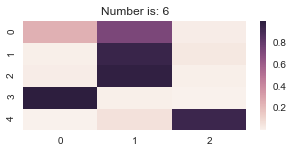

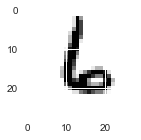

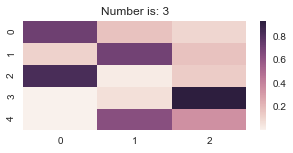

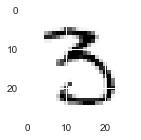

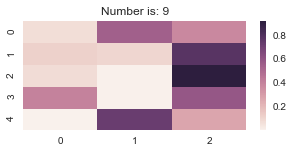

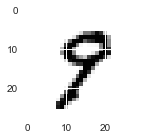

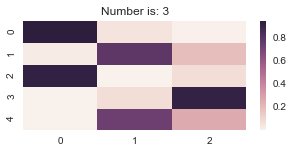

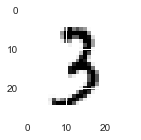

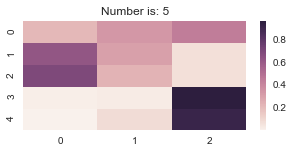

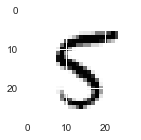

In [6]:
visualize_gates(gates, images, num_test_digits=5)


In [7]:
# Close all figures (so they don't stay open in memory)
plt.close('all')

In [9]:
compute_cosine_sim(gates, parameter_dict, num_test_digits=5, trial=2)

output [ 0.5692957   0.84257528  1.          0.44714624  0.69289584]
Most similar elems to trial [2 1 4 0 3]


# Visualizations of the gates (dim reduction)


In [10]:
# Preprocess to make gates the correct size
gates_reshaped = np.reshape(gates, [gates.shape[0], -1])

## Plot PCA

(2500, 15)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


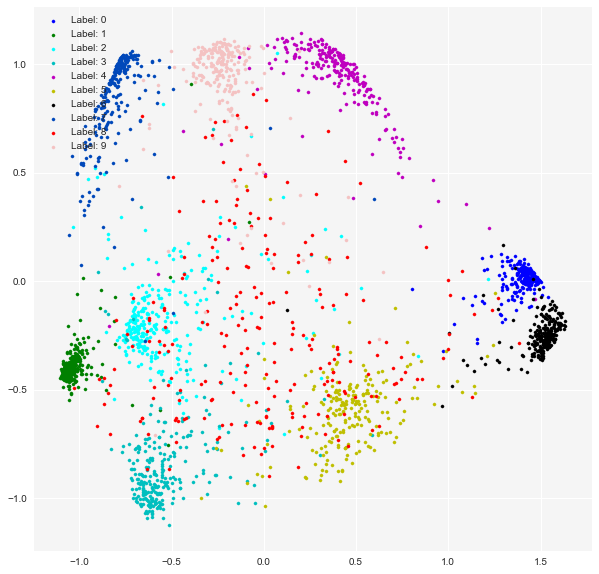

In [11]:
# Visualize PCA
visualize_model(gates_reshaped, labels, PCA())

## Plot t-SNE

(2500, 15)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 2500
[t-SNE] Computed conditional probabilities for sample 2000 / 2500
[t-SNE] Computed conditional probabilities for sample 2500 / 2500
[t-SNE] Mean sigma: 0.065807
[t-SNE] Iteration 25: error = 1.9018083, gradient norm = 0.0068903
[t-SNE] Iteration 50: error = 1.7004203, gradient norm = 0.0052829
[t-SNE] Iteration 75: error = 1.1755003, gradient norm = 0.0020690
[t-SNE] Iteration 100: error = 1.0997692, gradient norm = 0.0017250
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.099769
[t-SNE] Iteration 125: error = 0.9878631, gradient norm = 0.0013260
[t-SNE] Iteration 150: error = 0.9553265, gradient norm = 0.0012116
[t-SNE] Iteration 175: error = 0.9474291, gradient norm = 0.0011863
[t-SNE] Iteration 200: error = 0.9452919, gradient norm = 0.0011799
[t-SNE] Iteration 225: error = 

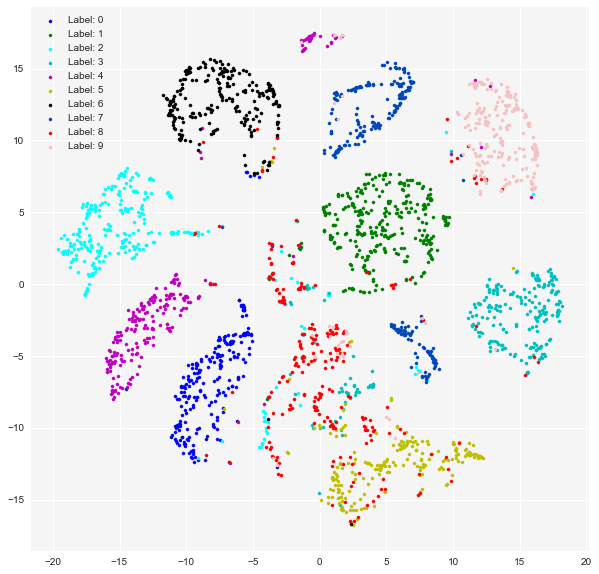

In [12]:
# Visualize t-SNE
visualize_model(gates_reshaped, labels, TSNE(verbose=100))

## Plot digit comparisons (PCA)

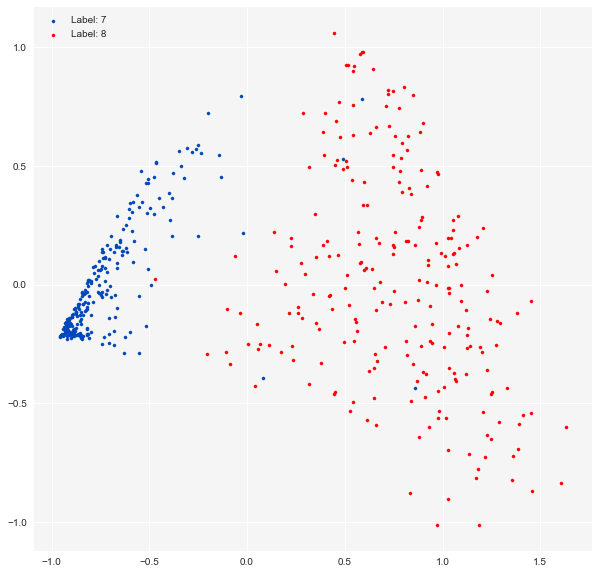

In [13]:
# Visualize the comparison between a and b (with PCA)
visualize_comparison(gates_reshaped, labels, PCA(), a=7, b=8)

## Plot digit comparisons (t-SNE)


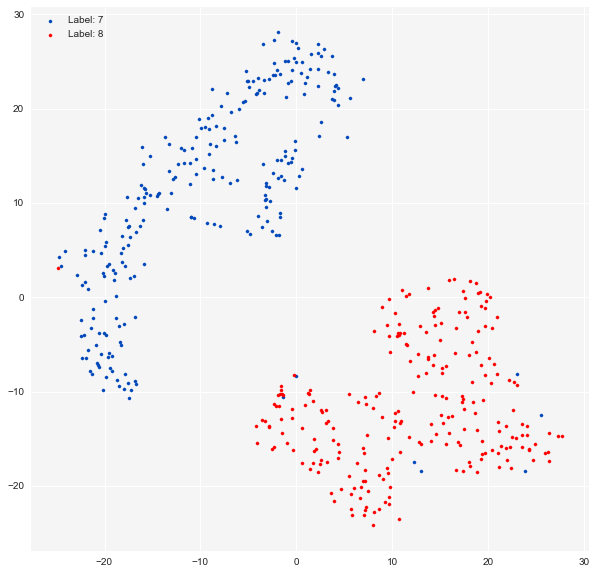

In [14]:
# Visualize the comparison between a and b (with t-SNE)
visualize_comparison(gates_reshaped, labels, TSNE(), a=7, b=8)